# Shifting Longitudes

* Sometimes we have data with longitudes as -180 to 180 and want to shift the data to be 0 to 360.  
* Sometimes we have data with longitudes as 0 to 360 and want to shift the data to be -180 to 180

### Common imports

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

### Data

HadISST (https://kpegion.github.io/COLA-DATASETS-CATALOG/hadisst.nc)

In [2]:
path='/project/atlantic_var/ogozdz/HadISST/downloaded/'
file='HadISST_sst.nc'

#### Read in the data using `xarray`

In [3]:
ds_hadisst=xr.open_dataset(path+file)
ds_hadisst

<xarray.Dataset>
Dimensions:    (latitude: 180, longitude: 360, nv: 2, time: 1792)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2019-0...
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    12/6/2019 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

#### Plot a specific latitude for a single time so we can check if our longitude shifting works

Text(0.5, 1.0, 'HADISST -180-180')

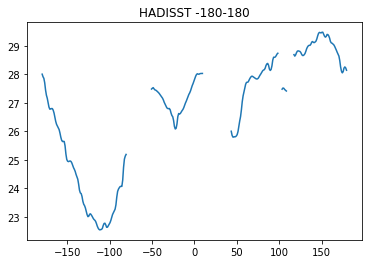

In [4]:
sst_check=ds_hadisst['sst'].sel(latitude=0,
                                time=ds_hadisst['time'][0],
                                method='nearest')
plt.plot(ds_hadisst['longitude'],sst_check)
plt.title('HADISST -180-180')

Note that the longitudes are from -180 to 180

#### Change the longitudes to be 0 to 360

How would I do this by hand? `new_lons=(lons+360) % 360` (% is the `modulo` function in python)
* lons=0; new_lons=360%360=0
* lons=180; new_lons=540%360=180
* lons=100; new_lons=260%360=100
* lons=-100; new_lons=460%360=260

In [5]:
-100%360

260

In [6]:
new_lons=((ds_hadisst['longitude'] + 360) % 360)
new_lons

<xarray.DataArray 'longitude' (longitude: 360)>
array([180.5, 181.5, 182.5, 183.5, 184.5, 185.5, 186.5, 187.5, 188.5,
       189.5, 190.5, 191.5, 192.5, 193.5, 194.5, 195.5, 196.5, 197.5,
       198.5, 199.5, 200.5, 201.5, 202.5, 203.5, 204.5, 205.5, 206.5,
       207.5, 208.5, 209.5, 210.5, 211.5, 212.5, 213.5, 214.5, 215.5,
       216.5, 217.5, 218.5, 219.5, 220.5, 221.5, 222.5, 223.5, 224.5,
       225.5, 226.5, 227.5, 228.5, 229.5, 230.5, 231.5, 232.5, 233.5,
       234.5, 235.5, 236.5, 237.5, 238.5, 239.5, 240.5, 241.5, 242.5,
       243.5, 244.5, 245.5, 246.5, 247.5, 248.5, 249.5, 250.5, 251.5,
       252.5, 253.5, 254.5, 255.5, 256.5, 257.5, 258.5, 259.5, 260.5,
       261.5, 262.5, 263.5, 264.5, 265.5, 266.5, 267.5, 268.5, 269.5,
       270.5, 271.5, 272.5, 273.5, 274.5, 275.5, 276.5, 277.5, 278.5,
       279.5, 280.5, 281.5, 282.5, 283.5, 284.5, 285.5, 286.5, 287.5,
       288.5, 289.5, 290.5, 291.5, 292.5, 293.5, 294.5, 295.5, 296.5,
       297.5, 298.5, 299.5, 300.5, 301.5, 302.5, 303.5, 304.5, 305.5,
       306.5, 307.5, 308.5, 309.5, 310.5, 311.5, 312.5, 313.5, 314.5,
       315.5, 316.5, 317.5, 318.5, 319.5, 320.5, 321.5, 322.5, 323.5,
       324.5, 325.5, 326.5, 327.5, 328.5, 329.5, 330.5, 331.5, 332.5,
       333.5, 334.5, 335.5, 336.5, 337.5, 338.5, 339.5, 340.5, 341.5,
       342.5, 343.5, 344.5, 345.5, 346.5, 347.5, 348.5, 349.5, 350.5,
       351.5, 352.5, 353.5, 354.5, 355.5, 356.5, 357.5, 358.5, 359.5,
...
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,
        45.5,  46.5,  47.5,  48.5,  49.5,  50.5,  51.5,  52.5,  53.5,
        54.5,  55.5,  56.5,  57.5,  58.5,  59.5,  60.5,  61.5,  62.5,
        63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,  70.5,  71.5,
        72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,  80.5,
        81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5,
        90.5,  91.5,  92.5,  93.5,  94.5,  95.5,  96.5,  97.5,  98.5,
        99.5, 100.5, 101.5, 102.5, 103.5, 104.5, 105.5, 106.5, 107.5,
       108.5, 109.5, 110.5, 111.5, 112.5, 113.5, 114.5, 115.5, 116.5,
       117.5, 118.5, 119.5, 120.5, 121.5, 122.5, 123.5, 124.5, 125.5,
       126.5, 127.5, 128.5, 129.5, 130.5, 131.5, 132.5, 133.5, 134.5,
       135.5, 136.5, 137.5, 138.5, 139.5, 140.5, 141.5, 142.5, 143.5,
       144.5, 145.5, 146.5, 147.5, 148.5, 149.5, 150.5, 151.5, 152.5,
       153.5, 154.5, 155.5, 156.5, 157.5, 158.5, 159.5, 160.5, 161.5,
       162.5, 163.5, 164.5, 165.5, 166.5, 167.5, 168.5, 169.5, 170.5,
       171.5, 172.5, 173.5, 174.5, 175.5, 176.5, 177.5, 178.5, 179.5],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5

In [7]:
ds_hadisst2=ds_hadisst.assign_coords(longitude=new_lons)
ds_hadisst2['longitude']

<xarray.DataArray 'longitude' (longitude: 360)>
array([180.5, 181.5, 182.5, ..., 177.5, 178.5, 179.5], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 180.5 181.5 182.5 183.5 ... 177.5 178.5 179.5

#### The data are out of order in terms of their longitude
We can use the `sortby` function to fix this. Note that we are applying this to the entire dataset

In [8]:
ds_hadisst2=ds_hadisst2.sortby(ds_hadisst2['longitude'])
ds_hadisst2

<xarray.Dataset>
Dimensions:    (latitude: 180, longitude: 360, nv: 2, time: 1792)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2019-0...
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 0.0 31.0 31.0 ... 5.451e+04 5.454e+04
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    12/6/2019 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

Text(0.5, 1.0, 'HADISST 0-360')

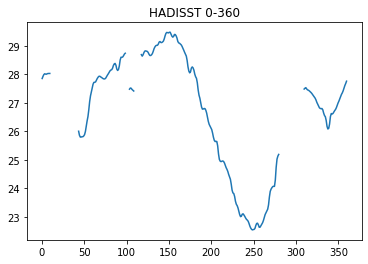

In [9]:
sst_check2=ds_hadisst2['sst'].sel(latitude=0,
                                  time=ds_hadisst2['time'][0],
                                  method='nearest')
plt.plot(ds_hadisst2['longitude'],sst_check2)
plt.title('HADISST 0-360')

#### We can do this in two lines

In [10]:
ds_hadisst3=ds_hadisst.assign_coords(longitude=((ds_hadisst['longitude'] + 360) % 360))
ds_hadisst3=ds_hadisst3.sortby(ds_hadisst3['longitude'])

Text(0.5, 1.0, 'HADISST 0-360 two lines')

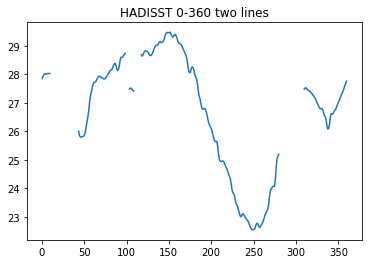

In [11]:
sst_check3=ds_hadisst3['sst'].sel(latitude=0,
                                  time=ds_hadisst3['time'][0],
                                  method='nearest')
plt.plot(ds_hadisst3['longitude'],sst_check3)
plt.title('HADISST 0-360 two lines')

### Challenge: Shift the longitudes from 0-360 to -180 to 180 

You have the HADISST data with longitudes from 0-360 in the variable `ds_hadisst3`

To shift data from 0-360 to -180 to 180, the formula is:

`new_lon=((lon +180) % 360))-180`

Shift the longitudes to -180 to 180, convince yourself it worked by plotting the longitudes for the same latitude and time we plotted before. It should look like our first plot. 

In [12]:
ds_hadisst4=ds_hadisst3.assign_coords(longitude=(((ds_hadisst3['longitude'] +180) % 360))-180)
ds_hadisst4=ds_hadisst4.sortby(ds_hadisst4['longitude'])

In [13]:
ds_hadisst4

<xarray.Dataset>
Dimensions:    (latitude: 180, longitude: 360, nv: 2, time: 1792)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2019-0...
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 0.0 31.0 31.0 ... 5.451e+04 5.454e+04
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    12/6/2019 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

Text(0.5, 1.0, 'HADISST -180-180 two lines')

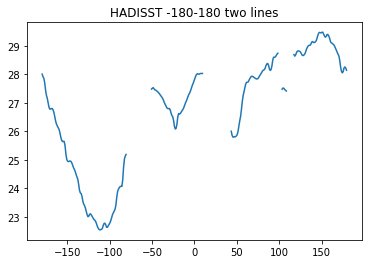

In [14]:
sst_check4=ds_hadisst4['sst'].sel(latitude=0,
                                  time=ds_hadisst4['time'][0],
                                  method='nearest')
plt.plot(ds_hadisst4['longitude'],sst_check4)
plt.title('HADISST -180-180 two lines')